In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('Ecommerce Customers')

In [27]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [28]:
import seaborn as sns

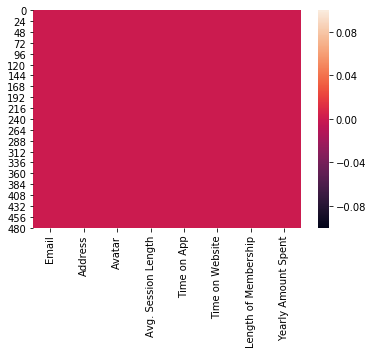

In [29]:
sns.heatmap(df.isnull())

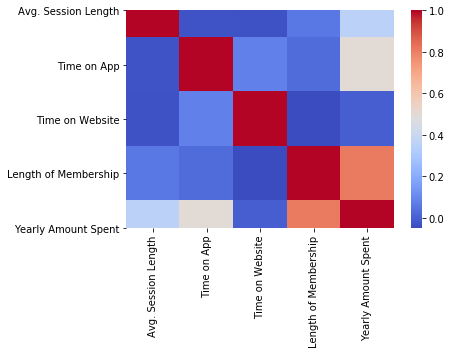

In [30]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [31]:
df.drop('Avatar',axis = 1 , inplace=True)

In [32]:
df.head(2)

,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933


In [33]:
df.drop('Address',axis=1,inplace=True)

In [34]:
df.drop('Email',axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [37]:
scaled_array= ss.fit_transform(df.drop('Yearly Amount Spent',axis=1))

In [38]:
scaled_array.shape

(500, 4)

In [39]:
X=pd.DataFrame(data = scaled_array,columns=df.columns[:-1])

In [40]:
X.head(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.456351,0.607280,2.493589,0.550107
1,-1.136502,-0.949464,0.206556,-0.870927


In [41]:
Y=df['Yearly Amount Spent']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
ypred = model.predict(X_test)

In [48]:
import matplotlib.pyplot as plt

(array([ 1.,  5., 12., 12., 36., 29., 25., 17.,  9.,  4.]),
 array([-31.04710469, -25.61025837, -20.17341206, -14.73656574,
         -9.29971942,  -3.8628731 ,   1.57397321,   7.01081953,
         12.44766585,  17.88451216,  23.32135848]),
 <a list of 10 Patch objects>)

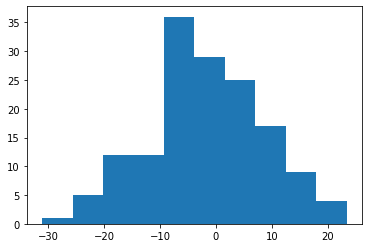

In [49]:
plt.hist(Y_test-ypred)

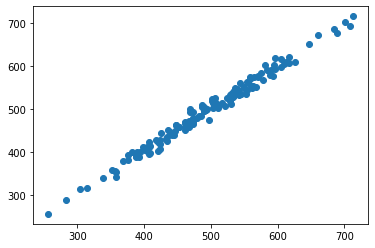

In [50]:
plt.scatter(Y_test,ypred)

In [51]:
(Y_test-ypred).mean()

-1.7875501813775365

In [52]:
from sklearn import metrics

In [53]:
metrics.mean_absolute_error(Y_test,ypred)

8.199251317777716

In [54]:
abs(Y_test-ypred).mean()

8.199251317777716